In [2]:
from smach_utils2 import *
import matplotlib.pyplot as plt
#arm = moveit_commander.MoveGroupCommander('arm')


[ WARN] [1707594003.062071254]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 462.575000 according to authority /pose_integrator
[ WARN] [1707594003.062120871]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 462.575000 according to authority /pose_integrator
[ WARN] [1707594004.449077316]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 463.416000 according to authority /pose_integrator
[ WARN] [1707594004.449129862]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 463.416000 according to authority /pose_integrator
[ WARN] [1707594004.449154100]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 463.416000 according to authority /pose_integrator
[ WARN] [1707594004.449176451]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 463.416000 according to authority /pose_integrator
[ WARN] [1707594004.44919802

[ WARN] [1707594012.354941590]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 467.481000 according to authority /pose_integrator
[ WARN] [1707594012.355022375]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 467.481000 according to authority /pose_integrator
[ WARN] [1707594012.355074747]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 467.481000 according to authority /pose_integrator
[ WARN] [1707594012.355124917]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 467.481000 according to authority /pose_integrator
[ WARN] [1707594012.355163817]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 467.481000 according to authority /pose_integrator
[ WARN] [1707594012.355198494]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 467.481000 according to authority /pose_integrator
[ WARN] [1707594012.35523569

[ WARN] [1707594015.434377102]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 469.100000 according to authority /pose_integrator
[ WARN] [1707594015.434425294]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 469.100000 according to authority /pose_integrator
[ WARN] [1707594015.434459990]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 469.100000 according to authority /pose_integrator
[ WARN] [1707594015.434498587]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 469.100000 according to authority /pose_integrator
[ WARN] [1707594015.434533377]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 469.100000 according to authority /pose_integrator
[ WARN] [1707594015.434573193]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 469.100000 according to authority /pose_integrator
[ WARN] [1707594015.43460705

[ WARN] [1707594024.753876528]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 474.072000 according to authority /pose_integrator
[ WARN] [1707594024.753921199]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 474.072000 according to authority /pose_integrator
[ WARN] [1707594024.753948819]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 474.072000 according to authority /pose_integrator
[ WARN] [1707594024.753983546]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 474.072000 according to authority /pose_integrator
[ WARN] [1707594024.754027752]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 474.072000 according to authority /pose_integrator
[ WARN] [1707594024.754070139]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 474.072000 according to authority /pose_integrator
[ WARN] [1707594024.75411302

[ WARN] [1707594038.084988121]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 481.015000 according to authority /pose_integrator
[ WARN] [1707594038.085026104]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 481.015000 according to authority /pose_integrator
[ WARN] [1707594038.085049808]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 481.015000 according to authority /pose_integrator
[ WARN] [1707594038.085072327]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 481.015000 according to authority /pose_integrator
[ WARN] [1707594038.085094218]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 481.015000 according to authority /pose_integrator
[ WARN] [1707594038.085115843]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 481.015000 according to authority /pose_integrator
[ WARN] [1707594038.08514548

[ WARN] [1707594046.340624419]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 485.367000 according to authority /pose_integrator
[ WARN] [1707594046.340663932]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 485.367000 according to authority /pose_integrator
[ WARN] [1707594046.340687567]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 485.367000 according to authority /pose_integrator
[ WARN] [1707594046.340709541]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 485.367000 according to authority /pose_integrator
[ WARN] [1707594046.340731848]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 485.367000 according to authority /pose_integrator
[ WARN] [1707594046.340753743]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 485.367000 according to authority /pose_integrator
[ WARN] [1707594046.34077545

[ WARN] [1707594053.481959503]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 489.233000 according to authority /pose_integrator
[ WARN] [1707594053.482008404]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 489.233000 according to authority /pose_integrator
[ WARN] [1707594053.482042798]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 489.233000 according to authority /pose_integrator
[ WARN] [1707594053.482079338]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 489.233000 according to authority /pose_integrator
[ WARN] [1707594053.482118805]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 489.233000 according to authority /pose_integrator
[ WARN] [1707594053.482155334]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 489.233000 according to authority /pose_integrator
[ WARN] [1707594053.48218949

In [5]:
followclient=actionlib.SimpleActionClient('/grasp_floor_act_server', FollowAction)

[ WARN] [1707594119.033008056]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 523.898000 according to authority /pose_integrator
[ WARN] [1707594119.033056233]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 523.898000 according to authority /pose_integrator
[ WARN] [1707594119.033095604]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 523.898000 according to authority /pose_integrator
[ WARN] [1707594119.033136128]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 523.898000 according to authority /pose_integrator
[ WARN] [1707594119.033178261]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 523.898000 according to authority /pose_integrator
[ WARN] [1707594119.033203917]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 523.898000 according to authority /pose_integrator
[ WARN] [1707594119.03322791

[ WARN] [1707594121.751420645]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 525.392000 according to authority /pose_integrator
[ WARN] [1707594121.751469598]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 525.392000 according to authority /pose_integrator
[ WARN] [1707594121.751508756]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 525.392000 according to authority /pose_integrator
[ WARN] [1707594121.751534317]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 525.392000 according to authority /pose_integrator
[ WARN] [1707594121.751558013]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 525.392000 according to authority /pose_integrator
[ WARN] [1707594121.751592921]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 525.392000 according to authority /pose_integrator
[ WARN] [1707594121.75161734

[ WARN] [1707594124.490885889]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 527.001000 according to authority /pose_integrator
[ WARN] [1707594124.490932328]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 527.001000 according to authority /pose_integrator
[ WARN] [1707594124.490958654]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 527.001000 according to authority /pose_integrator
[ WARN] [1707594124.490981552]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 527.001000 according to authority /pose_integrator
[ WARN] [1707594124.491003989]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 527.001000 according to authority /pose_integrator
[ WARN] [1707594124.491026925]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 527.001000 according to authority /pose_integrator
[ WARN] [1707594124.49104952

[ WARN] [1707594127.809434435]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 528.791000 according to authority /pose_integrator
[ WARN] [1707594127.809495261]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 528.791000 according to authority /pose_integrator
[ WARN] [1707594127.809532109]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 528.791000 according to authority /pose_integrator
[ WARN] [1707594127.809580742]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 528.791000 according to authority /pose_integrator
[ WARN] [1707594127.809617356]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 528.791000 according to authority /pose_integrator
[ WARN] [1707594127.809648001]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 528.791000 according to authority /pose_integrator
[ WARN] [1707594127.80968166

[ WARN] [1707594252.543845267]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 594.334000 according to authority /pose_integrator
[ WARN] [1707594252.543899660]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 594.334000 according to authority /pose_integrator
[ WARN] [1707594252.543938895]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 594.334000 according to authority /pose_integrator
[ WARN] [1707594252.543979291]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 594.334000 according to authority /pose_integrator
[ WARN] [1707594252.544020247]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 594.334000 according to authority /pose_integrator
[ WARN] [1707594252.544058850]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 594.334000 according to authority /pose_integrator
[ WARN] [1707594252.54409915

In [10]:
followclient.send_goal_and_wait(fag)

[ WARN] [1707594253.528741349]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 594.877000 according to authority /pose_integrator
[ WARN] [1707594253.528809479]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 594.877000 according to authority /pose_integrator
[ WARN] [1707594253.528851043]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 594.877000 according to authority /pose_integrator
[ WARN] [1707594253.528888424]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 594.877000 according to authority /pose_integrator
[ WARN] [1707594253.528923303]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 594.877000 according to authority /pose_integrator
[ WARN] [1707594253.528960069]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 594.877000 according to authority /pose_integrator
[ WARN] [1707594253.52899700

AttributeError: 'FollowActionGoal' object has no attribute 'timeout'

[ WARN] [1707594254.588079105]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 595.417000 according to authority /pose_integrator
[ WARN] [1707594254.588117750]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 595.417000 according to authority /pose_integrator
[ WARN] [1707594254.588141862]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 595.417000 according to authority /pose_integrator
[ WARN] [1707594254.588164965]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 595.417000 according to authority /pose_integrator
[ WARN] [1707594254.588187794]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 595.417000 according to authority /pose_integrator
[ WARN] [1707594254.588210080]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 595.417000 according to authority /pose_integrator
[ WARN] [1707594254.58823706

[ WARN] [1707594271.078730007]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 604.104000 according to authority /pose_integrator
[ WARN] [1707594271.078793113]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 604.104000 according to authority /pose_integrator
[ WARN] [1707594271.078843523]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 604.104000 according to authority /pose_integrator
[ WARN] [1707594271.078894417]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 604.104000 according to authority /pose_integrator
[ WARN] [1707594271.078944334]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 604.104000 according to authority /pose_integrator
[ WARN] [1707594271.079008903]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 604.104000 according to authority /pose_integrator
[ WARN] [1707594271.07905834

[ WARN] [1707594283.097015855]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 610.283000 according to authority /pose_integrator
[ WARN] [1707594283.097070448]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 610.283000 according to authority /pose_integrator
[ WARN] [1707594283.097102153]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 610.283000 according to authority /pose_integrator
[ WARN] [1707594283.097136424]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 610.283000 according to authority /pose_integrator
[ WARN] [1707594283.097182016]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 610.283000 according to authority /pose_integrator
[ WARN] [1707594283.097230443]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 610.283000 according to authority /pose_integrator
[ WARN] [1707594283.09726543

[ WARN] [1707594287.830808680]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 612.687000 according to authority /pose_integrator
[ WARN] [1707594287.830860435]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 612.687000 according to authority /pose_integrator
[ WARN] [1707594287.830903311]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 612.687000 according to authority /pose_integrator
[ WARN] [1707594287.830938490]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 612.687000 according to authority /pose_integrator
[ WARN] [1707594287.830969043]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 612.687000 according to authority /pose_integrator
[ WARN] [1707594287.831004966]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 612.687000 according to authority /pose_integrator
[ WARN] [1707594287.83104885

[ WARN] [1707594290.751298880]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 614.189000 according to authority /pose_integrator
[ WARN] [1707594290.751343398]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 614.189000 according to authority /pose_integrator
[ WARN] [1707594290.751368515]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 614.189000 according to authority /pose_integrator
[ WARN] [1707594290.751392035]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 614.189000 according to authority /pose_integrator
[ WARN] [1707594290.751418886]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 614.189000 according to authority /pose_integrator
[ WARN] [1707594290.751452345]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 614.189000 according to authority /pose_integrator
[ WARN] [1707594290.75147991

[ WARN] [1707594295.345081303]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 616.649000 according to authority /pose_integrator
[ WARN] [1707594295.345131481]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 616.649000 according to authority /pose_integrator
[ WARN] [1707594295.345163610]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 616.649000 according to authority /pose_integrator
[ WARN] [1707594295.345190087]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 616.649000 according to authority /pose_integrator
[ WARN] [1707594295.345223798]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 616.649000 according to authority /pose_integrator
[ WARN] [1707594295.345261710]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 616.649000 according to authority /pose_integrator
[ WARN] [1707594295.34531746

[ WARN] [1707594301.987414990]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 619.952000 according to authority /pose_integrator
[ WARN] [1707594301.987478669]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 619.952000 according to authority /pose_integrator
[ WARN] [1707594301.987515996]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 619.952000 according to authority /pose_integrator
[ WARN] [1707594301.987556663]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 619.952000 according to authority /pose_integrator
[ WARN] [1707594301.987609996]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 619.952000 according to authority /pose_integrator
[ WARN] [1707594301.987645779]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 619.952000 according to authority /pose_integrator
[ WARN] [1707594301.98768108

[ WARN] [1707594306.853203471]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 622.354000 according to authority /pose_integrator
[ WARN] [1707594306.853243531]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 622.354000 according to authority /pose_integrator
[ WARN] [1707594306.853268095]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 622.354000 according to authority /pose_integrator
[ WARN] [1707594306.853290673]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 622.354000 according to authority /pose_integrator
[ WARN] [1707594306.853312922]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 622.354000 according to authority /pose_integrator
[ WARN] [1707594306.853335145]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 622.354000 according to authority /pose_integrator
[ WARN] [1707594306.85335727

[ WARN] [1707594310.516624984]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 624.407000 according to authority /pose_integrator
[ WARN] [1707594310.516674670]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 624.407000 according to authority /pose_integrator
[ WARN] [1707594310.516708342]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 624.407000 according to authority /pose_integrator
[ WARN] [1707594310.516739909]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 624.407000 according to authority /pose_integrator
[ WARN] [1707594310.516776009]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 624.407000 according to authority /pose_integrator
[ WARN] [1707594310.516808894]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 624.407000 according to authority /pose_integrator
[ WARN] [1707594310.51684070

[ WARN] [1707594317.329250001]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 627.880000 according to authority /pose_integrator
[ WARN] [1707594317.329290276]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 627.880000 according to authority /pose_integrator
[ WARN] [1707594317.329315296]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 627.880000 according to authority /pose_integrator
[ WARN] [1707594317.329338597]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 627.880000 according to authority /pose_integrator
[ WARN] [1707594317.329362258]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 627.880000 according to authority /pose_integrator
[ WARN] [1707594317.329391587]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 627.880000 according to authority /pose_integrator
[ WARN] [1707594317.32941579

[ WARN] [1707594325.911489434]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 632.610000 according to authority /pose_integrator
[ WARN] [1707594325.911538151]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 632.610000 according to authority /pose_integrator
[ WARN] [1707594325.911584633]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 632.610000 according to authority /pose_integrator
[ WARN] [1707594325.911625912]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 632.610000 according to authority /pose_integrator
[ WARN] [1707594325.911665543]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 632.610000 according to authority /pose_integrator
[ WARN] [1707594325.911702416]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 632.610000 according to authority /pose_integrator
[ WARN] [1707594325.91174127

[ WARN] [1707594336.778919728]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 638.497000 according to authority /pose_integrator
[ WARN] [1707594336.778976765]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 638.497000 according to authority /pose_integrator
[ WARN] [1707594336.779023124]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 638.497000 according to authority /pose_integrator
[ WARN] [1707594336.779063508]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 638.497000 according to authority /pose_integrator
[ WARN] [1707594336.779101722]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 638.497000 according to authority /pose_integrator
[ WARN] [1707594336.779137049]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 638.497000 according to authority /pose_integrator
[ WARN] [1707594336.77917982

[ WARN] [1707594343.447515611]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 641.987000 according to authority /pose_integrator
[ WARN] [1707594343.447556653]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 641.987000 according to authority /pose_integrator
[ WARN] [1707594343.447594035]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 641.987000 according to authority /pose_integrator
[ WARN] [1707594343.447618049]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 641.987000 according to authority /pose_integrator
[ WARN] [1707594343.447640560]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 641.987000 according to authority /pose_integrator
[ WARN] [1707594343.447662412]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 641.987000 according to authority /pose_integrator
[ WARN] [1707594343.44769762

[ WARN] [1707594349.780847342]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 645.432000 according to authority /pose_integrator
[ WARN] [1707594349.780894412]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 645.432000 according to authority /pose_integrator
[ WARN] [1707594349.780923236]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 645.432000 according to authority /pose_integrator
[ WARN] [1707594349.780954352]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 645.432000 according to authority /pose_integrator
[ WARN] [1707594349.780992343]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 645.432000 according to authority /pose_integrator
[ WARN] [1707594349.781027917]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 645.432000 according to authority /pose_integrator
[ WARN] [1707594349.78105924

[ WARN] [1707594359.032270915]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 650.359000 according to authority /pose_integrator
[ WARN] [1707594359.032325633]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 650.359000 according to authority /pose_integrator
[ WARN] [1707594359.032361871]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 650.359000 according to authority /pose_integrator
[ WARN] [1707594359.032388223]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 650.359000 according to authority /pose_integrator
[ WARN] [1707594359.032415328]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 650.359000 according to authority /pose_integrator
[ WARN] [1707594359.032457372]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 650.359000 according to authority /pose_integrator
[ WARN] [1707594359.03249334

[ WARN] [1707594371.179480155]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 656.772000 according to authority /pose_integrator
[ WARN] [1707594371.179529135]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 656.772000 according to authority /pose_integrator
[ WARN] [1707594371.179553805]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 656.772000 according to authority /pose_integrator
[ WARN] [1707594371.179586475]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 656.772000 according to authority /pose_integrator
[ WARN] [1707594371.179612055]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 656.772000 according to authority /pose_integrator
[ WARN] [1707594371.179635090]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 656.772000 according to authority /pose_integrator
[ WARN] [1707594371.17965880

[ WARN] [1707594374.172107832]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 658.357000 according to authority /pose_integrator
[ WARN] [1707594374.172185357]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 658.357000 according to authority /pose_integrator
[ WARN] [1707594374.172238261]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 658.357000 according to authority /pose_integrator
[ WARN] [1707594374.172295423]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 658.357000 according to authority /pose_integrator
[ WARN] [1707594374.172346863]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 658.357000 according to authority /pose_integrator
[ WARN] [1707594374.172395892]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 658.357000 according to authority /pose_integrator
[ WARN] [1707594374.17244655

[ WARN] [1707594380.958323613]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 662.081000 according to authority /pose_integrator
[ WARN] [1707594380.958378886]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 662.081000 according to authority /pose_integrator
[ WARN] [1707594380.958424184]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 662.081000 according to authority /pose_integrator
[ WARN] [1707594380.958465391]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 662.081000 according to authority /pose_integrator
[ WARN] [1707594380.958508480]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 662.081000 according to authority /pose_integrator
[ WARN] [1707594380.958549427]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 662.081000 according to authority /pose_integrator
[ WARN] [1707594380.95857884

[ WARN] [1707594389.462813450]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 666.718000 according to authority /pose_integrator
[ WARN] [1707594389.462872513]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 666.718000 according to authority /pose_integrator
[ WARN] [1707594389.462915067]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 666.718000 according to authority /pose_integrator
[ WARN] [1707594389.462956751]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 666.718000 according to authority /pose_integrator
[ WARN] [1707594389.463005608]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 666.718000 according to authority /pose_integrator
[ WARN] [1707594389.463053053]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 666.718000 according to authority /pose_integrator
[ WARN] [1707594389.46309803

[ WARN] [1707594394.481277062]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 669.288000 according to authority /pose_integrator
[ WARN] [1707594394.481327823]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 669.288000 according to authority /pose_integrator
[ WARN] [1707594394.481368067]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 669.288000 according to authority /pose_integrator
[ WARN] [1707594394.481405676]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 669.288000 according to authority /pose_integrator
[ WARN] [1707594394.481447400]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 669.288000 according to authority /pose_integrator
[ WARN] [1707594394.481486771]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 669.288000 according to authority /pose_integrator
[ WARN] [1707594394.48151690

[ WARN] [1707594407.063006783]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 675.919000 according to authority /pose_integrator
[ WARN] [1707594407.063057181]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 675.919000 according to authority /pose_integrator
[ WARN] [1707594407.063102135]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 675.919000 according to authority /pose_integrator
[ WARN] [1707594407.063143950]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 675.919000 according to authority /pose_integrator
[ WARN] [1707594407.063181306]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 675.919000 according to authority /pose_integrator
[ WARN] [1707594407.063230413]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 675.919000 according to authority /pose_integrator
[ WARN] [1707594407.06327102

[ WARN] [1707594413.765706801]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 679.506000 according to authority /pose_integrator
[ WARN] [1707594413.765771363]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 679.506000 according to authority /pose_integrator
[ WARN] [1707594413.765803900]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 679.506000 according to authority /pose_integrator
[ WARN] [1707594413.765833306]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 679.506000 according to authority /pose_integrator
[ WARN] [1707594413.765875240]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 679.506000 according to authority /pose_integrator
[ WARN] [1707594413.765909887]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 679.506000 according to authority /pose_integrator
[ WARN] [1707594413.76594368

[ WARN] [1707594419.791857500]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 682.786000 according to authority /pose_integrator
[ WARN] [1707594419.791904643]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 682.786000 according to authority /pose_integrator
[ WARN] [1707594419.791932136]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 682.786000 according to authority /pose_integrator
[ WARN] [1707594419.791957502]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 682.786000 according to authority /pose_integrator
[ WARN] [1707594419.791987683]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 682.786000 according to authority /pose_integrator
[ WARN] [1707594419.792018633]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 682.786000 according to authority /pose_integrator
[ WARN] [1707594419.79205065

[ WARN] [1707594425.663906001]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 685.919000 according to authority /pose_integrator
[ WARN] [1707594425.663964913]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 685.919000 according to authority /pose_integrator
[ WARN] [1707594425.664008796]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 685.919000 according to authority /pose_integrator
[ WARN] [1707594425.664047710]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 685.919000 according to authority /pose_integrator
[ WARN] [1707594425.664085402]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 685.919000 according to authority /pose_integrator
[ WARN] [1707594425.664122410]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 685.919000 according to authority /pose_integrator
[ WARN] [1707594425.66415743

[ WARN] [1707594433.517915725]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 690.297000 according to authority /pose_integrator
[ WARN] [1707594433.517961224]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 690.297000 according to authority /pose_integrator
[ WARN] [1707594433.517986812]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 690.297000 according to authority /pose_integrator
[ WARN] [1707594433.518009856]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 690.297000 according to authority /pose_integrator
[ WARN] [1707594433.518031970]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 690.297000 according to authority /pose_integrator
[ WARN] [1707594433.518054158]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 690.297000 according to authority /pose_integrator
[ WARN] [1707594433.51807631

[ WARN] [1707594437.933539335]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 692.700000 according to authority /pose_integrator
[ WARN] [1707594437.933591171]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 692.700000 according to authority /pose_integrator
[ WARN] [1707594437.933626915]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 692.700000 according to authority /pose_integrator
[ WARN] [1707594437.933654994]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 692.700000 according to authority /pose_integrator
[ WARN] [1707594437.933690077]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 692.700000 according to authority /pose_integrator
[ WARN] [1707594437.933718929]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 692.700000 according to authority /pose_integrator
[ WARN] [1707594437.93375172

[ WARN] [1707594442.653494906]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 695.227000 according to authority /pose_integrator
[ WARN] [1707594442.653542754]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 695.227000 according to authority /pose_integrator
[ WARN] [1707594442.653589604]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 695.227000 according to authority /pose_integrator
[ WARN] [1707594442.653635663]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 695.227000 according to authority /pose_integrator
[ WARN] [1707594442.653676522]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 695.227000 according to authority /pose_integrator
[ WARN] [1707594442.653715722]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 695.227000 according to authority /pose_integrator
[ WARN] [1707594442.65375560

[ WARN] [1707594449.882204897]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 699.022000 according to authority /pose_integrator
[ WARN] [1707594449.882272607]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 699.022000 according to authority /pose_integrator
[ WARN] [1707594449.882333925]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 699.022000 according to authority /pose_integrator
[ WARN] [1707594449.882382591]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 699.022000 according to authority /pose_integrator
[ WARN] [1707594449.882432695]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 699.022000 according to authority /pose_integrator
[ WARN] [1707594449.882474622]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 699.022000 according to authority /pose_integrator
[ WARN] [1707594449.88251626

[ WARN] [1707594457.665200532]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 703.171000 according to authority /pose_integrator
[ WARN] [1707594457.665255446]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 703.171000 according to authority /pose_integrator
[ WARN] [1707594457.665295692]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 703.171000 according to authority /pose_integrator
[ WARN] [1707594457.665336829]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 703.171000 according to authority /pose_integrator
[ WARN] [1707594457.665379176]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 703.171000 according to authority /pose_integrator
[ WARN] [1707594457.665418639]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 703.171000 according to authority /pose_integrator
[ WARN] [1707594457.66544917

[ WARN] [1707594462.026656581]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 705.519000 according to authority /pose_integrator
[ WARN] [1707594462.026704502]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 705.519000 according to authority /pose_integrator
[ WARN] [1707594462.026743088]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 705.519000 according to authority /pose_integrator
[ WARN] [1707594462.026785529]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 705.519000 according to authority /pose_integrator
[ WARN] [1707594462.026824895]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 705.519000 according to authority /pose_integrator
[ WARN] [1707594462.026874637]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 705.519000 according to authority /pose_integrator
[ WARN] [1707594462.02691472

[ WARN] [1707594468.531119254]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 709.002000 according to authority /pose_integrator
[ WARN] [1707594468.531162425]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 709.002000 according to authority /pose_integrator
[ WARN] [1707594468.531198550]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 709.002000 according to authority /pose_integrator
[ WARN] [1707594468.531228577]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 709.002000 according to authority /pose_integrator
[ WARN] [1707594468.531261803]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 709.002000 according to authority /pose_integrator
[ WARN] [1707594468.531295496]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 709.002000 according to authority /pose_integrator
[ WARN] [1707594468.53133661

[ WARN] [1707594471.398632043]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 710.527000 according to authority /pose_integrator
[ WARN] [1707594471.398684571]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 710.527000 according to authority /pose_integrator
[ WARN] [1707594471.398715428]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 710.527000 according to authority /pose_integrator
[ WARN] [1707594471.398746983]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 710.527000 according to authority /pose_integrator
[ WARN] [1707594471.398776225]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 710.527000 according to authority /pose_integrator
[ WARN] [1707594471.398815780]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 710.527000 according to authority /pose_integrator
[ WARN] [1707594471.39885726

[ WARN] [1707594478.220552900]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 714.158000 according to authority /pose_integrator
[ WARN] [1707594478.220608762]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 714.158000 according to authority /pose_integrator
[ WARN] [1707594478.220646586]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 714.158000 according to authority /pose_integrator
[ WARN] [1707594478.220695145]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 714.158000 according to authority /pose_integrator
[ WARN] [1707594478.220743653]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 714.158000 according to authority /pose_integrator
[ WARN] [1707594478.220775389]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 714.158000 according to authority /pose_integrator
[ WARN] [1707594478.22081340

[ WARN] [1707594482.737379885]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 716.679000 according to authority /pose_integrator
[ WARN] [1707594482.737441515]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 716.679000 according to authority /pose_integrator
[ WARN] [1707594482.737480335]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 716.679000 according to authority /pose_integrator
[ WARN] [1707594482.737514468]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 716.679000 according to authority /pose_integrator
[ WARN] [1707594482.737551907]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 716.679000 according to authority /pose_integrator
[ WARN] [1707594482.737586510]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 716.679000 according to authority /pose_integrator
[ WARN] [1707594482.73762185

[ WARN] [1707594489.685993403]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 720.309000 according to authority /pose_integrator
[ WARN] [1707594489.686031978]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 720.309000 according to authority /pose_integrator
[ WARN] [1707594489.686055974]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 720.309000 according to authority /pose_integrator
[ WARN] [1707594489.686077988]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 720.309000 according to authority /pose_integrator
[ WARN] [1707594489.686099772]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 720.309000 according to authority /pose_integrator
[ WARN] [1707594489.686121530]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 720.309000 according to authority /pose_integrator
[ WARN] [1707594489.68614366

[ WARN] [1707594494.217471729]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 722.746000 according to authority /pose_integrator
[ WARN] [1707594494.217525197]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 722.746000 according to authority /pose_integrator
[ WARN] [1707594494.217690352]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 722.746000 according to authority /pose_integrator
[ WARN] [1707594494.220092887]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 722.746000 according to authority /pose_integrator
[ WARN] [1707594494.220149702]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 722.746000 according to authority /pose_integrator
[ WARN] [1707594494.220178815]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 722.746000 according to authority /pose_integrator
[ WARN] [1707594494.22021035

[ WARN] [1707594499.950607345]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 725.813000 according to authority /pose_integrator
[ WARN] [1707594499.950656593]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 725.813000 according to authority /pose_integrator
[ WARN] [1707594499.950684871]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 725.813000 according to authority /pose_integrator
[ WARN] [1707594499.950710774]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 725.813000 according to authority /pose_integrator
[ WARN] [1707594499.950736381]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 725.813000 according to authority /pose_integrator
[ WARN] [1707594499.950761444]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 725.813000 according to authority /pose_integrator
[ WARN] [1707594499.95079140

[ WARN] [1707594511.952485028]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 732.376000 according to authority /pose_integrator
[ WARN] [1707594511.952530104]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 732.376000 according to authority /pose_integrator
[ WARN] [1707594511.952569095]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 732.376000 according to authority /pose_integrator
[ WARN] [1707594511.952601550]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 732.376000 according to authority /pose_integrator
[ WARN] [1707594511.952630152]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 732.376000 according to authority /pose_integrator
[ WARN] [1707594511.952657428]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 732.376000 according to authority /pose_integrator
[ WARN] [1707594511.95268856

[ WARN] [1707594514.810390937]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 733.987000 according to authority /pose_integrator
[ WARN] [1707594514.810448115]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 733.987000 according to authority /pose_integrator
[ WARN] [1707594514.810487343]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 733.987000 according to authority /pose_integrator
[ WARN] [1707594514.810523061]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 733.987000 according to authority /pose_integrator
[ WARN] [1707594514.810555862]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 733.987000 according to authority /pose_integrator
[ WARN] [1707594514.810592194]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 733.987000 according to authority /pose_integrator
[ WARN] [1707594514.81062582

[ WARN] [1707594526.673163458]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 740.117000 according to authority /pose_integrator
[ WARN] [1707594526.673222429]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 740.117000 according to authority /pose_integrator
[ WARN] [1707594526.673264652]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 740.117000 according to authority /pose_integrator
[ WARN] [1707594526.673296009]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 740.117000 according to authority /pose_integrator
[ WARN] [1707594526.673323805]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 740.117000 according to authority /pose_integrator
[ WARN] [1707594526.673349696]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 740.117000 according to authority /pose_integrator
[ WARN] [1707594526.67337525

[ WARN] [1707594532.144105952]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 743.008000 according to authority /pose_integrator
[ WARN] [1707594532.144152451]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 743.008000 according to authority /pose_integrator
[ WARN] [1707594532.144181817]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 743.008000 according to authority /pose_integrator
[ WARN] [1707594532.144208544]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 743.008000 according to authority /pose_integrator
[ WARN] [1707594532.144244004]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 743.008000 according to authority /pose_integrator
[ WARN] [1707594532.144279298]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 743.008000 according to authority /pose_integrator
[ WARN] [1707594532.14431948

[ WARN] [1707594540.905156267]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 747.440000 according to authority /pose_integrator
[ WARN] [1707594540.905195577]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 747.440000 according to authority /pose_integrator
[ WARN] [1707594540.905218329]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 747.440000 according to authority /pose_integrator
[ WARN] [1707594540.905239657]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 747.440000 according to authority /pose_integrator
[ WARN] [1707594540.905260512]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 747.440000 according to authority /pose_integrator
[ WARN] [1707594540.905280585]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 747.440000 according to authority /pose_integrator
[ WARN] [1707594540.90530183

[ WARN] [1707594548.477493658]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 751.480000 according to authority /pose_integrator
[ WARN] [1707594548.477553715]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 751.480000 according to authority /pose_integrator
[ WARN] [1707594548.477581935]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 751.480000 according to authority /pose_integrator
[ WARN] [1707594548.477615932]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 751.480000 according to authority /pose_integrator
[ WARN] [1707594548.477647047]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 751.480000 according to authority /pose_integrator
[ WARN] [1707594548.477672579]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 751.480000 according to authority /pose_integrator
[ WARN] [1707594548.47769588

[ WARN] [1707594555.442828799]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 755.177000 according to authority /pose_integrator
[ WARN] [1707594555.442870879]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 755.177000 according to authority /pose_integrator
[ WARN] [1707594555.442898226]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 755.177000 according to authority /pose_integrator
[ WARN] [1707594555.442922819]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 755.177000 according to authority /pose_integrator
[ WARN] [1707594555.442947362]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 755.177000 according to authority /pose_integrator
[ WARN] [1707594555.442969882]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 755.177000 according to authority /pose_integrator
[ WARN] [1707594555.44299304

[ WARN] [1707594559.843263674]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 757.466000 according to authority /pose_integrator
[ WARN] [1707594559.843321234]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 757.466000 according to authority /pose_integrator
[ WARN] [1707594559.843367431]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 757.466000 according to authority /pose_integrator
[ WARN] [1707594559.843407868]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 757.466000 according to authority /pose_integrator
[ WARN] [1707594559.843446613]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 757.466000 according to authority /pose_integrator
[ WARN] [1707594559.843485813]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 757.466000 according to authority /pose_integrator
[ WARN] [1707594559.84352774

[ WARN] [1707594563.557153787]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 759.442000 according to authority /pose_integrator
[ WARN] [1707594563.557202529]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 759.442000 according to authority /pose_integrator
[ WARN] [1707594563.557234951]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 759.442000 according to authority /pose_integrator
[ WARN] [1707594563.557267321]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 759.442000 according to authority /pose_integrator
[ WARN] [1707594563.557302119]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 759.442000 according to authority /pose_integrator
[ WARN] [1707594563.557335905]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 759.442000 according to authority /pose_integrator
[ WARN] [1707594563.55737668

[ WARN] [1707594569.468903177]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 762.563000 according to authority /pose_integrator
[ WARN] [1707594569.468951374]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 762.563000 according to authority /pose_integrator
[ WARN] [1707594569.468986486]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 762.563000 according to authority /pose_integrator
[ WARN] [1707594569.469016290]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 762.563000 according to authority /pose_integrator
[ WARN] [1707594569.469044460]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 762.563000 according to authority /pose_integrator
[ WARN] [1707594569.469072146]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 762.563000 according to authority /pose_integrator
[ WARN] [1707594569.46909827

[ WARN] [1707594576.007823287]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 766.028000 according to authority /pose_integrator
[ WARN] [1707594576.007873266]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 766.028000 according to authority /pose_integrator
[ WARN] [1707594576.007912454]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 766.028000 according to authority /pose_integrator
[ WARN] [1707594576.007949306]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 766.028000 according to authority /pose_integrator
[ WARN] [1707594576.007977544]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 766.028000 according to authority /pose_integrator
[ WARN] [1707594576.008004816]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 766.028000 according to authority /pose_integrator
[ WARN] [1707594576.00803027

[ WARN] [1707594579.898664792]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 768.154000 according to authority /pose_integrator
[ WARN] [1707594579.898721054]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 768.154000 according to authority /pose_integrator
[ WARN] [1707594579.898751373]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 768.154000 according to authority /pose_integrator
[ WARN] [1707594579.898777828]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 768.154000 according to authority /pose_integrator
[ WARN] [1707594579.898804251]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 768.154000 according to authority /pose_integrator
[ WARN] [1707594579.898842258]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 768.154000 according to authority /pose_integrator
[ WARN] [1707594579.89887604

[ WARN] [1707594591.347925458]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 774.084000 according to authority /pose_integrator
[ WARN] [1707594591.347986181]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 774.084000 according to authority /pose_integrator
[ WARN] [1707594591.348034955]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 774.084000 according to authority /pose_integrator
[ WARN] [1707594591.348083584]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 774.084000 according to authority /pose_integrator
[ WARN] [1707594591.348131646]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 774.084000 according to authority /pose_integrator
[ WARN] [1707594591.348178821]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 774.084000 according to authority /pose_integrator
[ WARN] [1707594591.34822601

[ WARN] [1707594600.013407699]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 778.851000 according to authority /pose_integrator
[ WARN] [1707594600.013459746]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 778.851000 according to authority /pose_integrator
[ WARN] [1707594600.013503766]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 778.851000 according to authority /pose_integrator
[ WARN] [1707594600.013548471]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 778.851000 according to authority /pose_integrator
[ WARN] [1707594600.013591023]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 778.851000 according to authority /pose_integrator
[ WARN] [1707594600.013625475]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 778.851000 according to authority /pose_integrator
[ WARN] [1707594600.01364995

[ WARN] [1707594603.941124974]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 781.033000 according to authority /pose_integrator
[ WARN] [1707594603.941178708]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 781.033000 according to authority /pose_integrator
[ WARN] [1707594603.941212066]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 781.033000 according to authority /pose_integrator
[ WARN] [1707594603.941247738]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 781.033000 according to authority /pose_integrator
[ WARN] [1707594603.941283631]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 781.033000 according to authority /pose_integrator
[ WARN] [1707594603.941318371]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 781.033000 according to authority /pose_integrator
[ WARN] [1707594603.94135347

[ WARN] [1707594611.950104858]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 785.184000 according to authority /pose_integrator
[ WARN] [1707594611.950170619]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 785.184000 according to authority /pose_integrator
[ WARN] [1707594611.950218184]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 785.184000 according to authority /pose_integrator
[ WARN] [1707594611.950262602]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 785.184000 according to authority /pose_integrator
[ WARN] [1707594611.950315956]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 785.184000 according to authority /pose_integrator
[ WARN] [1707594611.950357171]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 785.184000 according to authority /pose_integrator
[ WARN] [1707594611.95039352

[ WARN] [1707594618.248895484]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 788.488000 according to authority /pose_integrator
[ WARN] [1707594618.248952636]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 788.488000 according to authority /pose_integrator
[ WARN] [1707594618.248984330]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 788.488000 according to authority /pose_integrator
[ WARN] [1707594618.249013272]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 788.488000 according to authority /pose_integrator
[ WARN] [1707594618.249053063]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 788.488000 according to authority /pose_integrator
[ WARN] [1707594618.249082421]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 788.488000 according to authority /pose_integrator
[ WARN] [1707594618.24911072

[ WARN] [1707594624.203246318]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 791.582000 according to authority /pose_integrator
[ WARN] [1707594624.203305404]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 791.582000 according to authority /pose_integrator
[ WARN] [1707594624.203351465]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 791.582000 according to authority /pose_integrator
[ WARN] [1707594624.203392911]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 791.582000 according to authority /pose_integrator
[ WARN] [1707594624.203432718]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 791.582000 according to authority /pose_integrator
[ WARN] [1707594624.203469648]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 791.582000 according to authority /pose_integrator
[ WARN] [1707594624.20350733

[ WARN] [1707594632.571888339]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 796.004000 according to authority /pose_integrator
[ WARN] [1707594632.571931870]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 796.004000 according to authority /pose_integrator
[ WARN] [1707594632.571958116]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 796.004000 according to authority /pose_integrator
[ WARN] [1707594632.571983234]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 796.004000 according to authority /pose_integrator
[ WARN] [1707594632.572007593]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 796.004000 according to authority /pose_integrator
[ WARN] [1707594632.572033048]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 796.004000 according to authority /pose_integrator
[ WARN] [1707594632.57205834

[ WARN] [1707594643.836089909]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 801.955000 according to authority /pose_integrator
[ WARN] [1707594643.836145362]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 801.955000 according to authority /pose_integrator
[ WARN] [1707594643.836179519]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 801.955000 according to authority /pose_integrator
[ WARN] [1707594643.836210021]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 801.955000 according to authority /pose_integrator
[ WARN] [1707594643.836246475]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 801.955000 according to authority /pose_integrator
[ WARN] [1707594643.836277562]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 801.955000 according to authority /pose_integrator
[ WARN] [1707594643.83630862

[ WARN] [1707594651.076951627]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 805.937000 according to authority /pose_integrator
[ WARN] [1707594651.077002143]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 805.937000 according to authority /pose_integrator
[ WARN] [1707594651.077029336]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 805.937000 according to authority /pose_integrator
[ WARN] [1707594651.077065887]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 805.937000 according to authority /pose_integrator
[ WARN] [1707594651.077097029]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 805.937000 according to authority /pose_integrator
[ WARN] [1707594651.077126040]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 805.937000 according to authority /pose_integrator
[ WARN] [1707594651.07715190

[ WARN] [1707594658.687191347]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 809.835000 according to authority /pose_integrator
[ WARN] [1707594658.687242449]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 809.835000 according to authority /pose_integrator
[ WARN] [1707594658.687279995]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 809.835000 according to authority /pose_integrator
[ WARN] [1707594658.687309132]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 809.835000 according to authority /pose_integrator
[ WARN] [1707594658.687342191]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 809.835000 according to authority /pose_integrator
[ WARN] [1707594658.687372099]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 809.835000 according to authority /pose_integrator
[ WARN] [1707594658.68740884

[ WARN] [1707594661.445957854]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 811.357000 according to authority /pose_integrator
[ WARN] [1707594661.446002143]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 811.357000 according to authority /pose_integrator
[ WARN] [1707594661.446030337]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 811.357000 according to authority /pose_integrator
[ WARN] [1707594661.446064869]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 811.357000 according to authority /pose_integrator
[ WARN] [1707594661.446098034]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 811.357000 according to authority /pose_integrator
[ WARN] [1707594661.446122735]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 811.357000 according to authority /pose_integrator
[ WARN] [1707594661.44614526

[ WARN] [1707594671.702582685]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 816.685000 according to authority /pose_integrator
[ WARN] [1707594671.702640868]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 816.685000 according to authority /pose_integrator
[ WARN] [1707594671.702666535]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 816.685000 according to authority /pose_integrator
[ WARN] [1707594671.702689676]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 816.685000 according to authority /pose_integrator
[ WARN] [1707594671.702711517]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 816.685000 according to authority /pose_integrator
[ WARN] [1707594671.702733859]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 816.685000 according to authority /pose_integrator
[ WARN] [1707594671.70275605

[ WARN] [1707594675.367699477]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 818.643000 according to authority /pose_integrator
[ WARN] [1707594675.367748156]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 818.643000 according to authority /pose_integrator
[ WARN] [1707594675.367777435]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 818.643000 according to authority /pose_integrator
[ WARN] [1707594675.367806240]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 818.643000 according to authority /pose_integrator
[ WARN] [1707594675.367838348]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 818.643000 according to authority /pose_integrator
[ WARN] [1707594675.367876554]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 818.643000 according to authority /pose_integrator
[ WARN] [1707594675.36791048

[ WARN] [1707594684.882692679]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 823.642000 according to authority /pose_integrator
[ WARN] [1707594684.882738976]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 823.642000 according to authority /pose_integrator
[ WARN] [1707594684.882780213]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 823.642000 according to authority /pose_integrator
[ WARN] [1707594684.882822014]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 823.642000 according to authority /pose_integrator
[ WARN] [1707594684.882862772]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 823.642000 according to authority /pose_integrator
[ WARN] [1707594684.882905404]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 823.642000 according to authority /pose_integrator
[ WARN] [1707594684.88294012

[ WARN] [1707594691.097630819]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 827.040000 according to authority /pose_integrator
[ WARN] [1707594691.097694925]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 827.040000 according to authority /pose_integrator
[ WARN] [1707594691.097737032]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 827.040000 according to authority /pose_integrator
[ WARN] [1707594691.097777000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 827.040000 according to authority /pose_integrator
[ WARN] [1707594691.097816440]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 827.040000 according to authority /pose_integrator
[ WARN] [1707594691.097850144]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 827.040000 according to authority /pose_integrator
[ WARN] [1707594691.09789771

[ WARN] [1707594695.046964368]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 829.149000 according to authority /pose_integrator
[ WARN] [1707594695.047004103]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 829.149000 according to authority /pose_integrator
[ WARN] [1707594695.047028152]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 829.149000 according to authority /pose_integrator
[ WARN] [1707594695.047050536]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 829.149000 according to authority /pose_integrator
[ WARN] [1707594695.047072658]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 829.149000 according to authority /pose_integrator
[ WARN] [1707594695.047094668]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 829.149000 according to authority /pose_integrator
[ WARN] [1707594695.04711672

[ WARN] [1707594699.385754394]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 831.550000 according to authority /pose_integrator
[ WARN] [1707594699.385804814]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 831.550000 according to authority /pose_integrator
[ WARN] [1707594699.385836684]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 831.550000 according to authority /pose_integrator
[ WARN] [1707594699.385874107]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 831.550000 according to authority /pose_integrator
[ WARN] [1707594699.385904641]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 831.550000 according to authority /pose_integrator
[ WARN] [1707594699.385934375]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 831.550000 according to authority /pose_integrator
[ WARN] [1707594699.38596299

[ WARN] [1707594705.027885412]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 834.651000 according to authority /pose_integrator
[ WARN] [1707594705.027927107]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 834.651000 according to authority /pose_integrator
[ WARN] [1707594705.027951832]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 834.651000 according to authority /pose_integrator
[ WARN] [1707594705.027977638]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 834.651000 according to authority /pose_integrator
[ WARN] [1707594705.028004971]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 834.651000 according to authority /pose_integrator
[ WARN] [1707594705.028031558]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 834.651000 according to authority /pose_integrator
[ WARN] [1707594705.02805586

[ WARN] [1707594709.297927994]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 836.987000 according to authority /pose_integrator
[ WARN] [1707594709.297997634]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 836.987000 according to authority /pose_integrator
[ WARN] [1707594709.298023841]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 836.987000 according to authority /pose_integrator
[ WARN] [1707594709.298060027]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 836.987000 according to authority /pose_integrator
[ WARN] [1707594709.298084782]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 836.987000 according to authority /pose_integrator
[ WARN] [1707594709.298108813]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 836.987000 according to authority /pose_integrator
[ WARN] [1707594709.29813249

[ WARN] [1707594717.345561916]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 841.217000 according to authority /pose_integrator
[ WARN] [1707594717.345617909]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 841.217000 according to authority /pose_integrator
[ WARN] [1707594717.345656627]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 841.217000 according to authority /pose_integrator
[ WARN] [1707594717.345692907]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 841.217000 according to authority /pose_integrator
[ WARN] [1707594717.345731026]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 841.217000 according to authority /pose_integrator
[ WARN] [1707594717.345769841]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 841.217000 according to authority /pose_integrator
[ WARN] [1707594717.34580863

[ WARN] [1707594725.563773535]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 845.392000 according to authority /pose_integrator
[ WARN] [1707594725.563832148]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 845.392000 according to authority /pose_integrator
[ WARN] [1707594725.563865177]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 845.392000 according to authority /pose_integrator
[ WARN] [1707594725.563892471]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 845.392000 according to authority /pose_integrator
[ WARN] [1707594725.563918959]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 845.392000 according to authority /pose_integrator
[ WARN] [1707594725.563944843]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 845.392000 according to authority /pose_integrator
[ WARN] [1707594725.56397042

[ WARN] [1707594731.834896443]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 848.781000 according to authority /pose_integrator
[ WARN] [1707594731.834952462]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 848.781000 according to authority /pose_integrator
[ WARN] [1707594731.834988917]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 848.781000 according to authority /pose_integrator
[ WARN] [1707594731.835021733]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 848.781000 according to authority /pose_integrator
[ WARN] [1707594731.835227149]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 848.781000 according to authority /pose_integrator
[ WARN] [1707594731.835279354]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 848.781000 according to authority /pose_integrator
[ WARN] [1707594731.83532519

[ WARN] [1707594735.574406398]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 850.759000 according to authority /pose_integrator
[ WARN] [1707594735.574448460]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 850.759000 according to authority /pose_integrator
[ WARN] [1707594735.574471913]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 850.759000 according to authority /pose_integrator
[ WARN] [1707594735.574493988]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 850.759000 according to authority /pose_integrator
[ WARN] [1707594735.574515732]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 850.759000 according to authority /pose_integrator
[ WARN] [1707594735.574537411]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 850.759000 according to authority /pose_integrator
[ WARN] [1707594735.57456656

[ WARN] [1707594740.845489740]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 853.498000 according to authority /pose_integrator
[ WARN] [1707594740.845538915]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 853.498000 according to authority /pose_integrator
[ WARN] [1707594740.845577165]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 853.498000 according to authority /pose_integrator
[ WARN] [1707594740.845612927]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 853.498000 according to authority /pose_integrator
[ WARN] [1707594740.845649757]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 853.498000 according to authority /pose_integrator
[ WARN] [1707594740.845691762]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 853.498000 according to authority /pose_integrator
[ WARN] [1707594740.84573263

[ WARN] [1707594744.611854574]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 855.484000 according to authority /pose_integrator
[ WARN] [1707594744.611916650]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 855.484000 according to authority /pose_integrator
[ WARN] [1707594744.611944731]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 855.484000 according to authority /pose_integrator
[ WARN] [1707594744.611969822]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 855.484000 according to authority /pose_integrator
[ WARN] [1707594744.611995133]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 855.484000 according to authority /pose_integrator
[ WARN] [1707594744.612018798]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 855.484000 according to authority /pose_integrator
[ WARN] [1707594744.61204219

[ WARN] [1707594749.049628668]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 857.901000 according to authority /pose_integrator
[ WARN] [1707594749.049680742]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 857.901000 according to authority /pose_integrator
[ WARN] [1707594749.049717708]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 857.901000 according to authority /pose_integrator
[ WARN] [1707594749.049752696]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 857.901000 according to authority /pose_integrator
[ WARN] [1707594749.049789875]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 857.901000 according to authority /pose_integrator
[ WARN] [1707594749.049824030]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 857.901000 according to authority /pose_integrator
[ WARN] [1707594749.04985502

[ WARN] [1707594755.956501383]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 861.660000 according to authority /pose_integrator
[ WARN] [1707594755.956557491]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 861.660000 according to authority /pose_integrator
[ WARN] [1707594755.956601462]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 861.660000 according to authority /pose_integrator
[ WARN] [1707594755.956641006]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 861.660000 according to authority /pose_integrator
[ WARN] [1707594755.956680434]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 861.660000 according to authority /pose_integrator
[ WARN] [1707594755.956718892]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 861.660000 according to authority /pose_integrator
[ WARN] [1707594755.95675541

[ WARN] [1707594764.383324687]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 866.096000 according to authority /pose_integrator
[ WARN] [1707594764.383381168]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 866.096000 according to authority /pose_integrator
[ WARN] [1707594764.383416351]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 866.096000 according to authority /pose_integrator
[ WARN] [1707594764.383448938]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 866.096000 according to authority /pose_integrator
[ WARN] [1707594764.383481468]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 866.096000 according to authority /pose_integrator
[ WARN] [1707594764.383514536]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 866.096000 according to authority /pose_integrator
[ WARN] [1707594764.38355027

shutdown request: [/smach] Reason: new node registered with same name


In [2]:
arm = moveit_commander.MoveGroupCommander('arm')

[ WARN] [1707334665.908626424]: Link hand_l_finger_vacuum_frame has visual geometry but no collision geometry. Collision geometry will be left empty. Fix your URDF file by explicitly specifying collision geometry.
[ WARN] [1707334665.911940658]: Link head_l_stereo_camera_link has visual geometry but no collision geometry. Collision geometry will be left empty. Fix your URDF file by explicitly specifying collision geometry.
[ WARN] [1707334665.911975292]: Link head_r_stereo_camera_link has visual geometry but no collision geometry. Collision geometry will be left empty. Fix your URDF file by explicitly specifying collision geometry.
[ WARN] [1707334665.912965503]: Group state 'neutral' doesn't specify all group joints in group 'arm'. wrist_ft_sensor_frame_joint is missing.
[ WARN] [1707334665.912999694]: Group state 'go' doesn't specify all group joints in group 'arm'. wrist_ft_sensor_frame_joint is missing.
[ WARN] [1707334666.464070213]: Kinematics solver doesn't support #attempts any

In [3]:

arm.set_named_target('go')
arm.go()

True

In [6]:
head.set_joint_values([0.0,-0.65])
rospy.sleep(0.6)
rospy.sleep(0.6)
image= cv2.cvtColor(rgbd.get_image(), cv2.COLOR_RGB2BGR)
img_msg  = bridge.cv2_to_imgmsg(image)
req      = classify_client.request_class()
req.in_.image_msgs.append(img_msg)
res      = classify_client(req)
debug_image=   cv2.cvtColor(bridge.imgmsg_to_cv2(res.debug_image.image_msgs[0]), cv2.COLOR_RGB2BGR)

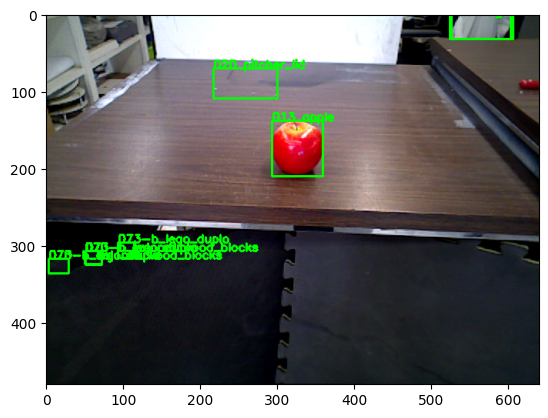

In [7]:

plt.imshow(debug_image)

In [8]:

for i in range(len(res.poses)):
    tf_man.getTF("head_rgbd_sensor_rgb_frame")
    tf_man.pub_static_tf(pos=[res.poses[i].position.x ,res.poses[i].position.y,res.poses[i].position.z], rot=[0,0,0,1],ref="head_rgbd_sensor_rgb_frame",point_name=res.names[i].data[4:] )   
    rospy.sleep(0.3)
    tf_man.change_ref_frame_tf(res.names[i].data[4:])



In [ ]:
omni_base.move_d_to(target_distance=0.78,target_link='apple')

In [9]:
target_object='apple'
trans,_=tf_man.getTF(target_object,ref_frame="base_link")
trans


[0.6187705128982248, 0.01148776299407439, 0.7115365596628173]

In [10]:
target_object='apple'
_,rot= tf_man.getTF("base_link",ref_frame='map')

original_rot=tf.transformations.euler_from_quaternion(rot)[2]
trans,_=tf_man.getTF(target_object,ref_frame="base_link")


trans , original_rot

([0.6197961303552155, 0.01193066374500451, 0.7115365596628174],
 3.033456346382446)

In [11]:
_,rot= tf_man.getTF("base_link",ref_frame='map')
original_rot=tf.transformations.euler_from_quaternion(rot)[2]
target_object='apple'


succ = False
            
while not succ:
    
    _,rot= tf_man.getTF("base_link",ref_frame='map')
    trans,_=tf_man.getTF(target_object,ref_frame="base_link")

    trans
    eX, eY, eZ = trans
    
    eX+= -0.4
    eY+= -.06
    
    eT= tf.transformations.euler_from_quaternion(rot)[2] - original_rot #Original 
    print (eT)
    if eT > np.pi: eT=-2*np.pi+eT
    if eT < -np.pi: eT= 2*np.pi+eT
    rospy.loginfo("error: {:.2f}, {:.2f}, angle {:.2f}, target obj frame {}".format(eX, eY , eT,target_object))
    X, Y, Z = trans
    rospy.loginfo("Pose: {:.2f}, {:.2f}, angle {:.2f}, target obj frame {}".format(X, Y , eT,target_object))
    
    if abs(eX) <=0.05 :
        print ('here')
        eX = 0
    if abs(eY) <=0.05  :
        eY = 0
    if abs(eT   ) < 0.1:
        eT = 0
    succ =  eX == 0 and eY == 0 and eT==0

    
    omni_base.tiny_move( velX=0.2*+eX,velY=0.3*eY, velT=-eT,std_time=0.2, MAX_VEL=0.3) 


0.0
[INFO] [1707334700.336308]: error: 0.22, -0.05, angle 0.00, target obj frame apple
[INFO] [1707334700.341208]: Pose: 0.62, 0.01, angle 0.00, target obj frame apple
0.0002302821296220614
[INFO] [1707334700.546857]: error: 0.22, -0.05, angle 0.00, target obj frame apple
[INFO] [1707334700.551499]: Pose: 0.62, 0.01, angle 0.00, target obj frame apple
-0.0007101173996568733
[INFO] [1707334700.757369]: error: 0.20, -0.05, angle -0.00, target obj frame apple
[INFO] [1707334700.761673]: Pose: 0.60, 0.01, angle -0.00, target obj frame apple
0.004340856488828315
[INFO] [1707334700.966771]: error: 0.20, -0.05, angle 0.00, target obj frame apple
[INFO] [1707334700.971477]: Pose: 0.60, 0.01, angle 0.00, target obj frame apple
0.0062689742848140995
[INFO] [1707334701.176638]: error: 0.19, -0.05, angle 0.01, target obj frame apple
[INFO] [1707334701.180971]: Pose: 0.59, 0.01, angle 0.01, target obj frame apple
0.009831574911224994
[INFO] [1707334701.385987]: error: 0.18, -0.05, angle 0.01, targe

In [12]:
res.names

[data: "013_apple",
 data: "020_pitcher_lid",
 data: "073-b_lego_duplo",
 data: "073-b_lego_duplo",
 data: "070-b_colored_wood_blocks",
 data: "019-a_pitcher_base",
 data: "070-b_colored_wood_blocks",
 data: "073-b_lego_duplo",
 data: "004_sugar_box"]

In [13]:
hand_cam= HAND_RGB()


In [14]:
#clear_octo_client()

pickup_pose=[0.65,-1.2,0.0,-1.9, 0.0, 0.0]
succ= arm.go(pickup_pose)
gripper.open()


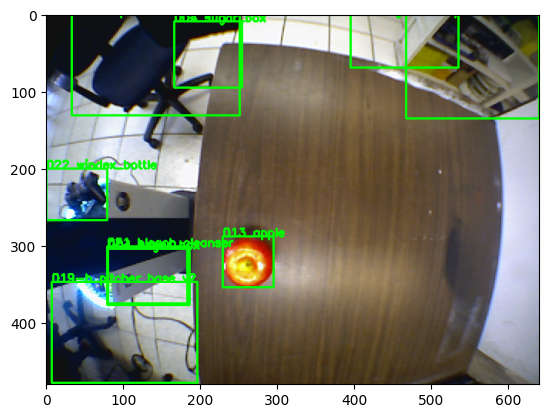

In [15]:

image= cv2.cvtColor(hand_cam.get_image(), cv2.COLOR_RGB2BGR)
img_msg  = bridge.cv2_to_imgmsg(image)
req      = classify_client.request_class()
req.in_.image_msgs.append(img_msg)
res      = classify_client(req)
debug_image=   cv2.cvtColor(bridge.imgmsg_to_cv2(res.debug_image.image_msgs[0]), cv2.COLOR_RGB2BGR)

plt.imshow(debug_image)

## [(323, 266), (280, 215)]  at pkcp pose


In [13]:
abs(eX) > 0.05 or abs(eY) > 0.05

False

In [16]:
eX,eY= 0.3,0.3 

while abs(eX) > 0.05 or abs(eY) > 0.05:
    image= cv2.cvtColor(hand_cam.get_image(), cv2.COLOR_RGB2BGR)
    img_msg  = bridge.cv2_to_imgmsg(image)
    req      = classify_client.request_class()
    req.in_.image_msgs.append(img_msg)
    res      = classify_client(req)


    for i in range(len(res.names)):
        if res.names[i].data== '013_apple' or res.names[i].data== '017_orange':
            bbM=res.pt_min.data[2*i:2*i+2]
            bbm=res.pt_max.data[2*i:2*i+2]
            bbx=[bbM,bbm]
    print(bbx)
    eY=(bbx[1][1]-215)/215    #experience value
    #print(f'error relative to gripper cam {eY}')


    #eX=(bbx[0][0]-323)/323
    eX=(bbx[0][0]-291)/291
    eY=(bbx[1][1]-226)/226
    #eY=(bbx[1][1]-215)/215    #experience value

    print(f'error relative to gripper cam ex={eX} ey={eY}')
    omni_base.tiny_move(velX=eX, velY=-eY, MAX_VEL=0.05) 
print(f'error relative to gripper cam ex={eX} ey={eY}:::::: Error within tolerance')

[(295, 354), (229, 288)]
error relative to gripper cam ex=0.013745704467353952 ey=0.2743362831858407
[(290, 338), (224, 271)]
error relative to gripper cam ex=-0.003436426116838488 ey=0.19911504424778761
[(285, 302), (217, 235)]
error relative to gripper cam ex=-0.020618556701030927 ey=0.03982300884955752
error relative to gripper cam ex=-0.020618556701030927 ey=0.03982300884955752:::::: Error within tolerance


In [17]:
clear_octo_client()

av=arm.get_current_joint_values()
print (av,'av')
av[0]+= -0.17###LAB
#av[0]+= -0.35###GAZ
succ=arm.go(av)
rospy.sleep(0.5)
gripper.close(force=0.06)

[0.6499066268807862, -1.1998775280188854, -1.9345343694077144e-05, -1.8999196302849657, 8.010822381621097e-05, 0.0] av


In [18]:
av=arm.get_current_joint_values()
print (av,'av')
av[0]+= 0.15
succ=arm.go(av)
omni_base.tiny_move(velX=-0.3, std_time=4.0)
arm.set_named_target('go')
arm.go()
#tf_man.pub_static_tf(point_name='apple')

[0.47998808379913616, -1.1711155280188854, 0.04347365465630615, -1.8999516302849657, 0.00046110822381617567, 0.0] av


True